# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_sphere.pickle') as f:
        model_sphere = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (35,25)
Number of data: 875.0
dx: 352.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_sphere['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 40.0 degree
Main field declination: 45.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_sphere['m_R']
print 'Inclination: %.1f degree' % model_sphere['inc_R']
print 'Declination: %.1f degree' % model_sphere['dec_R']

Intensity: 3.0 A/m
Inclination: 30.0 degree
Declination: 20.0 degree


In [16]:
inc_R,dec_R = model_sphere['inc_R'],model_sphere['dec_R']

## Generating the layer with my function 

In [17]:
h = 1050.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e3,1e4,1e5,5*1e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_sphere_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_sphere_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-0.71832085616 -3.96699503171
i = 1
4.83236190221 -2.15008948432
i = 2
7.71772011751 -1.13333273566
i = 3
9.77766401103 -0.309188137354
i = 4
11.4022571524 0.464833179839
i = 5
12.7345999834 1.17608849652
i = 6
13.8556042283 1.80837048584
i = 7
14.821206985 2.37781139559
i = 8
15.6686942014 2.90370785643
i = 9
16.4220901091 3.40763283521
i = 10
17.097421632 3.88561693949
i = 11
17.7061919018 4.33661148471
i = 12
18.2577488122 4.75944282508
i = 13
18.7606681162 5.15711122203
i = 14
19.221359124 5.52840886823
i = 15
19.6452502595 5.87399464101
i = 16
20.0367863155 6.19367370247
i = 17
20.4002611641 6.48870292491
i = 18
20.7395477767 6.76033563787
i = 19
21.0584892259 7.01269317171
i = 20
21.3595071795 7.25154089589
i = 21
21.6446639996 7.48140484926
i = 22
21.9153568762 7.702945029
i = 23
22.1728454903 7.91664471024
i = 24
22.4179916859 8.1222592604
i = 25
22.6519420006 8.31981504204
i = 26
22.8754927755 8.50966075214
i = 27
23.0893854887 8.69212932524
i = 28
23.2942523238 8.867292

28.6247449394 13.7044955649
i = 79
28.6835999034 13.7655584461
i = 80
28.741458565 13.8257329476
i = 81
28.7983450849 13.8850319149
i = 82
28.8542827875 13.9434645468
i = 83
28.9092985099 14.0010626529
i = 84
28.9634144555 14.0578491148
i = 85
29.0166407464 14.1138283368
i = 86
29.0689987789 14.1690176092
i = 87
29.1205097103 14.2234301256
i = 88
29.1711955016 14.2770793961
i = 89
29.2210739758 14.3299632509
i = 90
29.2701582807 14.3820582826
i = 91
29.3184671224 14.4333776662
i = 92
29.3660194467 14.4839364543
i = 93
29.4128333332 14.5337435378
i = 94
29.4589304587 14.5828115741
i = 95
29.5043253598 14.6311481793
i = 96
29.5490382794 14.6787577567
i = 97
29.5930837454 14.7256492318
i = 98
29.6364769842 14.7718349632
i = 99
29.679233395 14.8173289634
i = 100
29.7213679431 14.8621397151
i = 101
29.7628892505 14.9062742776
i = 102
29.8038155782 14.9497538437
i = 103
29.8441645737 14.9925869836
i = 104
29.8839482982 15.0347846814
i = 105
29.9231772698 15.0763522614
i = 106
29.9618626642 1

31.4018153308 16.7059870518
i = 0
-0.670185358049 -3.85506522096
i = 1
4.91995466661 -1.99766213468
i = 2
7.85411097189 -0.973148518506
i = 3
9.94704378032 -0.0902999751782
i = 4
11.5817322688 0.709176126605
i = 5
12.9166086477 1.42282535713
i = 6
14.0413523158 2.05984042046
i = 7
15.0124573525 2.64182144284
i = 8
15.8655661274 3.19568574942
i = 9
16.6218696486 3.71928987211
i = 10
17.2987520416 4.21019455312
i = 11
17.9088289786 4.67261481673
i = 12
18.4621305847 5.10586755507
i = 13
18.9668582615 5.5090859736
i = 14
19.429682306 5.88337170264
i = 15
19.856036694 6.22911974705
i = 16
20.2508240634 6.54893657973
i = 17
20.6182380428 6.84509253573
i = 18
20.9621068901 7.12120979937
i = 19
21.2857374035 7.38231876714
i = 20
21.5916154202 7.63212036316
i = 21
21.8816715034 7.87272117285
i = 22
22.1572183855 8.10446727003
i = 23
22.4193456095 8.32740979455
i = 24
22.6691295969 8.54165282683
i = 25
22.9076957905 8.7471650328
i = 26
23.1358903381 8.94413103424
i = 27
23.3544706626 9.13292619

30.3496002843 15.8756171672
i = 73
30.438982098 15.9568304094
i = 74
30.5271173448 16.0367979329
i = 75
30.6140382143 16.1155405947
i = 76
30.699775064 16.1930798041
i = 77
30.7843574566 16.2694372251
i = 78
30.8678088578 16.3446230882
i = 79
30.9501517284 16.4186377786
i = 80
31.0314168243 16.4915129376
i = 81
31.1116305649 16.5632617974
i = 82
31.1908188993 16.6339214356
i = 83
31.2689872898 16.7034716353
i = 84
31.3461564985 16.7719286952
i = 85
31.4223383391 16.8392809753
i = 86
31.4975480792 16.9055629313
i = 87
31.5718040824 16.970787532
i = 88
31.6451175166 17.0349488783
i = 89
31.7175055656 17.0980672279
i = 90
31.788986124 17.1601834301
i = 91
31.8595769632 17.2213143282
i = 92
31.9292845571 17.2814709248
i = 93
31.9981166158 17.3406203783
i = 94
32.0660915364 17.3987868545
i = 95
32.1332200145 17.4559949129
i = 96
32.1995137228 17.5122685785
i = 97
32.2649632857 17.5675844609
i = 98
32.329578513 17.6219454151
i = 99
32.3933711684 17.6753556595
i = 100
32.4563437527 17.7278065

## L-curve visualization

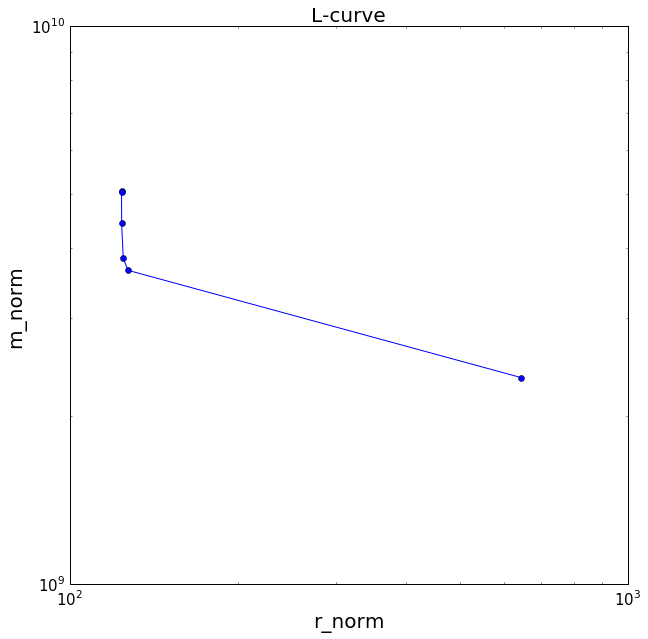

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
